<a href="https://colab.research.google.com/github/abdipourasl/Alzheimer/blob/main/AD_PLV_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Check if TPU is available
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Automatically detects the TPU
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    print("TPU is ready")
except ValueError:
    print("TPU not available, running on CPU/GPU.")

strategy = tf.distribute.TPUStrategy(resolver)

TPU is ready


# 80% for Train, 20% for Test

## PLV Images

### Load PLV Images

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import gdown
file_id = '1jWL4uB1PWY_k6HcvngN-b66nkUL7hz9H' #Delta_Pre_EC
# file_id = '1nE92WetD0IsKuEoQLU4RaQ7pdvClhFC_' #Full_Pre_EC

destination = 'PLV Images.rar'  # Replace with your desired file name and extension
gdown.download(id=file_id, output=destination, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1jWL4uB1PWY_k6HcvngN-b66nkUL7hz9H
From (redirected): https://drive.google.com/uc?id=1jWL4uB1PWY_k6HcvngN-b66nkUL7hz9H&confirm=t&uuid=eaafb12c-517e-483a-969a-76e5d5d37433
To: /content/PLV Images.rar
100%|██████████| 931M/931M [00:06<00:00, 136MB/s]


'PLV Images.rar'

In [ ]:
!unrar x 'PLV Images.rar'

Streaming output truncated to the last 5000 lines.
Extracting  delta/subject_083_trial_10_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_11_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_12_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_13_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_14_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_15_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_16_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_17_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_18_delta.jpg                          53%  OK 
Extracting  delta/subject_083_trial_19_delta.jpg                          53%  OK 
Extracting  delta/subject_083

### Load Demographic & Tests

In [ ]:
import gdown

file_id = '1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2'
destination = 'tests.xlsx'
gdown.download(id=file_id, output=destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2
To: /content/tests.xlsx
100%|██████████| 18.3k/18.3k [00:00<00:00, 22.3MB/s]


'tests.xlsx'

### Seperate data


In [ ]:
import os
import shutil
from pathlib import Path
from PIL import Image  # Pillow library for image processing

# Path to the original images
original_images_path = Path('/content/delta')

# Path to save the organized and cropped images
organized_cropped_path = Path('/content/Organized_Images')

# Create the destination directory if it doesn't exist
organized_cropped_path.mkdir(parents=True, exist_ok=True)

#### Crop

In [ ]:
# Calculate the crop box coordinates
left = 140
upper = 50
right = 875 - 205  # 660
lower = 656 - 78   # 578

crop_box = (left, upper, right, lower)  # (140, 50, 660, 578)

print(f"Crop Box Coordinates: {crop_box}")


Crop Box Coordinates: (140, 50, 670, 578)


#### Organize data

In [ ]:
# Iterate through all files in the original_images_path
for image_path in original_images_path.iterdir():
    # Check if the current path is a file and has a valid image extension
    if image_path.is_file() and image_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
        # Example filename format: subject_001_trial_1.jpg
        # Split the filename to extract parts
        parts = image_path.stem.split('_')  # 'stem' gives the filename without extension

        # Ensure the filename has at least 3 parts and starts with 'subject'
        if len(parts) >= 3 and parts[0].lower() == 'subject':
            subject_number = parts[1]  # '001'

            # Define the subject folder name
            subject_folder_name = f'subject_{subject_number}'

            # Define the full path to the subject folder
            subject_folder = organized_cropped_path / subject_folder_name

            # Create the subject folder if it doesn't exist
            subject_folder.mkdir(exist_ok=True)

            # Define the destination path for the cropped image
            destination = subject_folder / image_path.name

            try:
                # Open the image using PIL
                with Image.open(image_path) as img:
                    # Crop the image
                    cropped_img = img.crop(crop_box)

                    # Save the cropped image to the destination folder
                    cropped_img.save(destination)

                print(f'Cropped and moved {image_path.name} to {subject_folder_name}')
            except Exception as e:
                print(f'Error processing {image_path.name}: {e}')
        else:
            print(f'Skipping file with unexpected format: {image_path.name}')


Streaming output truncated to the last 5000 lines.
Cropped and moved subject_087_trial_45_delta.jpg to subject_087
Cropped and moved subject_130_trial_51_delta.jpg to subject_130
Cropped and moved subject_001_trial_30_delta.jpg to subject_001
Cropped and moved subject_099_trial_67_delta.jpg to subject_099
Cropped and moved subject_069_trial_14_delta.jpg to subject_069
Cropped and moved subject_031_trial_35_delta.jpg to subject_031
Cropped and moved subject_138_trial_76_delta.jpg to subject_138
Cropped and moved subject_063_trial_70_delta.jpg to subject_063
Cropped and moved subject_115_trial_7_delta.jpg to subject_115
Cropped and moved subject_074_trial_12_delta.jpg to subject_074
Cropped and moved subject_119_trial_40_delta.jpg to subject_119
Cropped and moved subject_081_trial_68_delta.jpg to subject_081
Cropped and moved subject_056_trial_32_delta.jpg to subject_056
Cropped and moved subject_069_trial_9_delta.jpg to subject_069
Cropped and moved subject_132_trial_62_delta.jpg to sub

### Load Labels


In [ ]:
# Install required libraries
!pip install --upgrade pandas openpyxl

# Import necessary libraries
import pandas as pd
import os
import shutil
from pathlib import Path


In [ ]:
# Define the path to the Excel file
excel_path = Path('/content/tests.xlsx')  # Adjust if the file is in a different location

# Read the Excel file
# Assuming that the data starts from the first row and relevant columns are A (Subject ID), B (Diagnosi), and E (MMSE)
df = pd.read_excel(excel_path, usecols=['ID pz', 'Diagnosi', 'MMSE'])

# Display the first few rows to verify
print("Excel Data Preview:")
print(df.head())


Excel Data Preview:
   ID pz Diagnosi   MMSE
0      4       AD  16.46
1      7       AD  23.27
2     16       AD  13.86
3     19       AD  19.86
4     20       AD  22.85


In [ ]:
# df = pd.read_excel(excel_path, header=None, usecols=[0,1,4], names=['Subject_ID', 'Diagnosi', 'MMSE'])


In [ ]:
# Ensure that Subject_ID is treated as string and zero-padded to match folder names
df['Subject_ID'] = df['ID pz'].astype(str).str.zfill(3)  # Converts 1 to '001', 4 to '004', etc.

# Create a dictionary mapping Subject_ID to Diagnosi
subject_to_diagnosis = pd.Series(df.Diagnosi.values, index=df.Subject_ID).to_dict()

# (Optional) Create a dictionary mapping Subject_ID to MMSE scores
subject_to_mmse = pd.Series(df.MMSE.values, index=df.Subject_ID).to_dict()

# Display the mapping
print("\nSubject to Diagnosis Mapping:")
print(subject_to_diagnosis)



Subject to Diagnosis Mapping:
{'004': 'AD', '007': 'AD', '016': 'AD', '019': 'AD', '020': 'AD', '021': 'AD', '027': 'AD', '028': 'AD', '031': 'AD', '035': 'AD', '037': 'AD', '040': 'AD', '044': 'AD', '046': 'AD', '053': 'AD', '055': 'AD', '058': 'AD', '059': 'AD', '061': 'AD', '065': 'AD', '069': 'AD', '076': 'AD', '078': 'AD', '082': 'AD', '083': 'AD', '085': 'AD', '088': 'AD', '089': 'AD', '091': 'AD', '092': 'AD', '096': 'AD', '103': 'AD', '107': 'AD', '109': 'AD', '114': 'AD', '115': 'AD', '129': 'AD', '131': 'AD', '132': 'AD', '133': 'AD', '135': 'AD', '136': 'AD', '137': 'AD', '138': 'AD', '139': 'AD', '142': 'AD', '143': 'AD', '145': 'AD', '146': 'AD', '149': 'AD', '001': 'MCI', '002': 'MCI', '003': 'MCI', '008': 'MCI', '014': 'MCI', '023': 'MCI', '024': 'MCI', '025': 'MCI', '026': 'MCI', '029': 'MCI', '033': 'MCI', '034': 'MCI', '039': 'MCI', '042': 'MCI', '045': 'MCI', '048': 'MCI', '049': 'MCI', '052': 'MCI', '054': 'MCI', '056': 'MCI', '063': 'MCI', '064': 'MCI', '067': 'MC

In [ ]:
# # Define paths
# organized_images_path = Path('/content/Organized_Images')  # Path where subject folders are located
# labeled_images_path = Path('/content/Labeled Images')      # Path where labeled folders will be created

# # Create parent directories for each diagnostic group
# diagnostic_groups = ['AD', 'MCI', 'CNTRL']
# for group in diagnostic_groups:
#     (labeled_images_path / group).mkdir(parents=True, exist_ok=True)
#     print(f"Created folder: {group}")

# # Iterate through each subject folder and move it to the corresponding diagnostic group folder
# for subject_folder in organized_images_path.iterdir():
#     if subject_folder.is_dir() and subject_folder.name.startswith('subject_'):
#         # Extract the subject number from the folder name
#         subject_number = subject_folder.name.split('_')[1]  # '001' from 'subject_001'

#         # Lookup the diagnosis
#         diagnosis = subject_to_diagnosis.get(subject_number)

#         if diagnosis in diagnostic_groups:
#             # Define the destination path
#             destination = labeled_images_path / diagnosis / subject_folder.name

#             # Move the folder
#             shutil.move(str(subject_folder), str(destination))
#             print(f"Moved {subject_folder.name} to {diagnosis} folder.")
#         else:
#             print(f"Diagnosis for {subject_folder.name} not found or invalid. Skipping.")


In [ ]:
# import os
# import re
# import numpy as np

# data_dir = 'PLV(Subject Wise)'


# def extract_numeric_part(folder_name):
#     parts = folder_name.split('_')
#     for part in parts:
#         if part.startswith('Subject'):
#             return int(part.replace('Subject', ''))
#     return -1  # Return -1 if no numeric part is found

# folders = sorted([f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))], key=extract_numeric_part)

# subject_folders, labels = [], []

# for folder_name in folders:
#     subject_num = extract_numeric_part(folder_name)
#     subject_folder = os.path.join(data_dir, folder_name)
#     subject_folders.append(subject_folder)

# labels = []
# for subject_num in range(1, 81):  # Assuming subject numbers 1 to 80
#     if 1 <= subject_num <= 20 or 41 <= subject_num <= 60:
#         labels.append(0)  # AD group
#     elif 21 <= subject_num <= 40 or 61 <= subject_num <= 80:
#         labels.append(1)  # HC group



# subject_folders = np.array(subject_folders)
# subject_folders = list(subject_folders)

# labels = list(labels)
# print("Labels:", labels)

## Data Loading and Assigning

### Load Libraries

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
import gdown
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, LearningRateScheduler
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, DenseNet121, EfficientNetB2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shutil


In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


### Read Excel

In [ ]:
# Download the Excel file using gdown
file_id = '1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2'
destination = 'tests.xlsx'
gdown.download(id=file_id, output=destination, quiet=False)
excel_path = Path('tests.xlsx')  # Adjust the path if necessary

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_path)

# Inspect the DataFrame
print("DataFrame Head:")
print(df.head())

# Create a mapping from subject ID to MMSE score
# Assuming 'ID pz' is the subject ID and 'MMSE' is the score
id_to_mmse = pd.Series(df.MMSE.values, index=df['ID pz']).to_dict()

print("Subject ID to MMSE Mapping:")
print(id_to_mmse)


Downloading...
From: https://drive.google.com/uc?id=1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2
To: /content/tests.xlsx
100%|██████████| 18.3k/18.3k [00:00<00:00, 22.3MB/s]

DataFrame Head:
   ID pz Diagnosi  Age Sesso   MMSE  STAI_Y1  STAI_Y2  PSQI   ESS   HAM
0      4       AD   69     M  16.46     28.0     31.0   3.0   4.0   5.0
1      7       AD   63     F  23.27     35.0     54.0  13.0  14.0  24.0
2     16       AD   72     F  13.86      NaN      NaN   NaN   NaN   NaN
3     19       AD   77     F  19.86     30.0     30.0   1.0   2.0  14.0
4     20       AD   83     M  22.85     32.0     39.0  10.0   5.0  12.0
Subject ID to MMSE Mapping:
{4: 16.46, 7: 23.27, 16: 13.86, 19: 19.86, 20: 22.85, 21: 16.27, 27: 21.24, 28: 23.86, 31: 18.24, 35: 21.85, 37: 19.03, 40: 12.27, 44: 22.2, 46: 21.2, 53: 19.2, 55: 10.3, 58: 21.49, 59: 7.03, 61: 10.3, 65: 21.86, 69: 21.53, 76: 15.2, 78: 10.3, 82: 25.24, 83: 24.85, 85: 12.86, 88: 22.49, 89: 19.86, 91: 19.53, 92: 22.2, 96: 22.03, 103: 19.46, 107: 12.24, 109: 22.2, 114: 20.03, 115: 21.86, 129: 12.03, 131: 19.86, 132: 17.74, 133: 14.27, 135: 19.03, 136: 22.24, 137: 20.53, 138: 12.03, 139: 19.85, 142: 14.6, 143: 10.03, 145

### Assign MMSE Scores & Data loading

In [ ]:
data_dir = '/content/Organized_Images'

def extract_numeric_part(folder_name):
    # Extract numeric part assuming folder names like 'subject_004'
    match = re.search(r'\d+', folder_name)
    return int(match.group()) if match else -1

folders = sorted(
    [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))],
    key=extract_numeric_part
)

subject_folders, mmse_scores = [], []

for folder_name in folders:
    subject_num = extract_numeric_part(folder_name)
    subject_folder = os.path.join(data_dir, folder_name)
    if subject_num in id_to_mmse:
        mmse = id_to_mmse[subject_num]
        if not pd.isna(mmse):  # Ensure MMSE score is not NaN
            subject_folders.append(subject_folder)
            mmse_scores.append(mmse)
        else:
            print(f"Skipping Subject {subject_num} due to missing MMSE score.")
    else:
        print(f"Subject ID {subject_num} not found in Excel data. Skipping.")

# Convert to NumPy arrays
subject_folders = np.array(subject_folders)
mmse_scores = np.array(mmse_scores)

print(f"Total Subjects with MMSE Scores: {len(subject_folders)}")


Total Subjects with MMSE Scores: 133


In [ ]:
def load_images_and_labels(subjects, labels):
    images, labels_t = [], []
    for subject_folder, label in zip(subjects, labels):
        for filename in os.listdir(subject_folder):
            # Ensure filename is a string
            if isinstance(filename, bytes):
                filename = filename.decode('utf-8')  # Decode bytes to string

            img_path = os.path.join(subject_folder, filename)
            try:
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img)
                img_array = img_array / 255.0  # Normalize to [0,1]
                images.append(img_array)
                labels_t.append(label)
            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")

    return np.array(images), np.array(labels_t)


In [ ]:
def load_and_preprocess_data(subject_folders, mmse_scores):
    train_subjects, test_subjects, train_labels, test_labels = train_test_split(
        subject_folders, mmse_scores, test_size=0.2, random_state=42
    )

    train_subjects, val_subjects, train_labels, val_labels = train_test_split(
        train_subjects, train_labels, test_size=0.1, random_state=42
    )

    train_images, train_labels_t = load_images_and_labels(train_subjects, train_labels)
    val_images, val_labels_t = load_images_and_labels(val_subjects, val_labels)

    test_image_counts_per_subject = [len(os.listdir(folder)) for folder in test_subjects]
    test_images, test_labels_t = load_images_and_labels(test_subjects, test_labels)

    return (
        train_images, train_labels_t,
        val_images, val_labels_t,
        test_images, test_labels_t,
        test_subjects, test_image_counts_per_subject
    )


### Define model

In [ ]:
def create_new_model(base_model, fine_tune_at=None):
    model = clone_model(base_model)

    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True
    else:
        for layer in model.layers:
            layer.trainable = False  # Freeze the base model layers

    x = model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)

    predictions = Dense(1, activation='linear')(x)  # Linear activation for regression

    model = Model(inputs=model.input, outputs=predictions)
    model.compile(
        loss='mean_squared_error',  # Use MSE for regression
        optimizer=Adam(learning_rate=0.0001),
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model


In [ ]:
def evaluate_model(true_values, predictions, iteration, model_name='model',
                   test_subjects=None, test_image_counts_per_subject=None,
                   id_to_mmse=None):
    """
    Evaluates the regression model's performance and generates evaluation plots.

    Args:
        true_values (array-like): Actual MMSE scores.
        predictions (array-like): Predicted MMSE scores by the model.
        iteration (int): Current iteration number for labeling plots.
        model_name (str): Name of the model for saving plots.
        test_subjects (array-like, optional): List of test subject folder paths.
        test_image_counts_per_subject (list, optional): Number of images per test subject.
        id_to_mmse (dict, optional): Mapping from subject ID to MMSE scores.

    Returns:
        dict: Dictionary containing calculated metrics.
    """
    # Calculate metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)

    # Print metrics
    print(f"Iteration {iteration + 1} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # Scatter Plot of Predictions vs True Values
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=true_values, y=predictions, alpha=0.5)
    plt.xlabel('True MMSE')
    plt.ylabel('Predicted MMSE')
    plt.title(f'True vs Predicted MMSE - Iteration {iteration + 1}')
    # Plot a diagonal line for reference
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r--')
    scatter_plot_filename = f'{model_name}_scatter_iteration_{iteration + 1}.png'
    plt.savefig(scatter_plot_filename)
    plt.close()
    print(f"Scatter plot saved as {scatter_plot_filename}")

    # Residuals Plot
    residuals = true_values - predictions
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Residuals Distribution - Iteration {iteration + 1}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    residuals_plot_filename = f'{model_name}_residuals_iteration_{iteration + 1}.png'
    plt.savefig(residuals_plot_filename)
    plt.close()
    print(f"Residuals distribution plot saved as {residuals_plot_filename}")

    # (Optional) Per-Subject Aggregated Evaluation
    if test_subjects is not None and test_image_counts_per_subject is not None and id_to_mmse is not None:
        aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
            test_subjects, test_image_counts_per_subject, predictions
        )

        # Remove any subjects with NaN true values
        valid_indices = ~np.isnan(aggregated_true)
        aggregated_true = aggregated_true[valid_indices]
        aggregated_preds = aggregated_preds[valid_indices]

        # Calculate aggregated metrics
        agg_mae = mean_absolute_error(aggregated_true, aggregated_preds)
        agg_mse = mean_squared_error(aggregated_true, aggregated_preds)
        agg_rmse = np.sqrt(agg_mse)
        agg_r2 = r2_score(aggregated_true, aggregated_preds)

        print(f"Aggregated - Iteration {iteration + 1} - MAE: {agg_mae:.4f}, MSE: {agg_mse:.4f}, RMSE: {agg_rmse:.4f}, R²: {agg_r2:.4f}")

        # Scatter Plot for Aggregated Predictions
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=aggregated_true, y=aggregated_preds, alpha=0.5)
        plt.xlabel('True MMSE')
        plt.ylabel('Predicted MMSE')
        plt.title(f'True vs Predicted MMSE (Aggregated) - Iteration {iteration + 1}')
        plt.plot([min(aggregated_true), max(aggregated_true)],
                 [min(aggregated_true), max(aggregated_true)], 'r--')
        agg_scatter_plot_filename = f'{model_name}_aggregated_scatter_iteration_{iteration + 1}.png'
        plt.savefig(agg_scatter_plot_filename)
        plt.close()
        print(f"Aggregated scatter plot saved as {agg_scatter_plot_filename}")

        # Return both individual and aggregated metrics
        return {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'Aggregated_MAE': agg_mae,
            'Aggregated_MSE': agg_mse,
            'Aggregated_RMSE': agg_rmse,
            'Aggregated_R2': agg_r2
        }

    # Return metrics as a dictionary
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }


In [ ]:
def aggregate_subject_predictions_weighted(test_subjects, test_image_counts_per_subject, test_predictions, confidence_scores=None):
    """
    Aggregates predictions for each subject using a weighted average.

    Args:
        test_subjects (array-like): List of test subject folder paths.
        test_image_counts_per_subject (list): Number of images per test subject.
        test_predictions (array-like): Predicted MMSE scores for all test images.
        confidence_scores (array-like, optional): Confidence scores for each prediction.

    Returns:
        tuple: Aggregated true MMSE scores and aggregated predicted MMSE scores per subject.
    """
    aggregated_true = []
    aggregated_preds = []
    start_idx = 0
    for folder, count in zip(test_subjects, test_image_counts_per_subject):
        end_idx = start_idx + count
        subject_preds = test_predictions[start_idx:end_idx]
        if confidence_scores is not None:
            subject_confidences = confidence_scores[start_idx:end_idx]
            subject_pred = np.average(subject_preds, weights=subject_confidences)
        else:
            subject_pred = np.mean(subject_preds)
        aggregated_preds.append(subject_pred)

        # Extract subject number from folder name
        subject_num = extract_numeric_part(folder)
        aggregated_true.append(id_to_mmse.get(subject_num, np.nan))

        start_idx = end_idx
    return np.array(aggregated_true), np.array(aggregated_preds)


In [ ]:
import matplotlib.pyplot as plt

def train_and_evaluate_model(base_model, subject_folders, mmse_scores, num_epochs=100, num_iterations=1, model_name='model'):
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []
    agg_mae_list, agg_mse_list, agg_rmse_list, agg_r2_list = [], [], [], []

    # Lists to store loss data for plotting
    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration + 1}:")

        model = create_new_model(base_model)

        (
            train_images, train_labels_t,
            val_images, val_labels_t,
            test_images, test_labels_t,
            test_subjects, test_image_counts_per_subject
        ) = load_and_preprocess_data(subject_folders, mmse_scores)

        # Shuffle training data
        train_data = list(zip(train_images, train_labels_t))
        np.random.shuffle(train_data)
        train_images, train_labels_t = zip(*train_data)
        train_images, train_labels_t = np.array(train_images), np.array(train_labels_t)

        # Shuffle validation data
        val_data = list(zip(val_images, val_labels_t))
        np.random.shuffle(val_data)
        val_images, val_labels_t = zip(*val_data)
        val_images, val_labels_t = np.array(val_images), np.array(val_labels_t)

        # Define callbacks
        checkpoint_dir = 'checkpoints'
        os.makedirs(checkpoint_dir, exist_ok=True)

        local_checkpoint_filepath = os.path.join(checkpoint_dir, f"{model_name}_best1_weights_iteration_{iteration + 1}.weights.h5")

        checkpoint_callback = ModelCheckpoint(
            filepath=local_checkpoint_filepath,
            monitor='val_mean_squared_error',
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_mean_squared_error',
            patience=15,
            verbose=1,
            mode='min',
            restore_best_weights=True
        )

        lr_scheduler = LearningRateScheduler(lr_schedule)

        # Train the model
        history = model.fit(
            train_images, train_labels_t,
            epochs=num_epochs,
            batch_size=16,
            validation_data=(val_images, val_labels_t),
            callbacks=[checkpoint_callback, early_stopping, lr_scheduler],
            verbose=1
        )

        # Collect loss data
        train_losses.append(history.history['loss'])  # Training loss
        val_losses.append(history.history['val_loss'])  # Validation loss

        # Load the best weights
        model.load_weights(local_checkpoint_filepath)

        # Evaluate on test data
        test_predictions = model.predict(test_images).flatten()

        # Call evaluate_model function with aggregation
        metrics = evaluate_model(
            true_values=test_labels_t,
            predictions=test_predictions,
            iteration=iteration,
            model_name=model_name,
            test_subjects=test_subjects,
            test_image_counts_per_subject=test_image_counts_per_subject,
            id_to_mmse=id_to_mmse  # Ensure this dictionary is accessible
        )

        # Append individual metrics
        mae_list.append(metrics['MAE'])
        mse_list.append(metrics['MSE'])
        rmse_list.append(metrics['RMSE'])
        r2_list.append(metrics['R2'])

        # Append aggregated metrics if available
        if 'Aggregated_MAE' in metrics:
            agg_mae_list.append(metrics['Aggregated_MAE'])
            agg_mse_list.append(metrics['Aggregated_MSE'])
            agg_rmse_list.append(metrics['Aggregated_RMSE'])
            agg_r2_list.append(metrics['Aggregated_R2'])

    print("\nAverage Metrics Across Iterations:")
    print(f"Average MAE: {np.mean(mae_list):.4f}")
    print(f"Average MSE: {np.mean(mse_list):.4f}")
    print(f"Average RMSE: {np.mean(rmse_list):.4f}")
    print(f"Average R²: {np.mean(r2_list):.4f}")

    # If aggregated metrics are collected, print their averages as well
    if agg_mae_list:
        print(f"Average Aggregated MAE: {np.mean(agg_mae_list):.4f}")
        print(f"Average Aggregated MSE: {np.mean(agg_mse_list):.4f}")
        print(f"Average Aggregated RMSE: {np.mean(agg_rmse_list):.4f}")
        print(f"Average Aggregated R²: {np.mean(agg_r2_list):.4f}")

    # Plotting training and validation losses
    plt.figure(figsize=(12, 6))

    # Plot for all iterations
    for i in range(num_iterations):
        plt.plot(range(1, len(train_losses[i]) + 1), train_losses[i], label=f'Train Loss Iteration {i+1}')
        plt.plot(range(1, len(val_losses[i]) + 1), val_losses[i], label=f'Val Loss Iteration {i+1}')

    plt.title(f'{model_name} - Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    elif epoch < 40:
        return lr * 0.95
    else:
        return lr * 0.85
# def exponential_decay(epoch, lr):
#     k = 0.1
#     return lr * np.exp(-k*epoch)


## Train - Delta Band

#### VGG16

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 340.8245 - mean_absolute_error: 15.7824 - mean_squared_error: 340.8245
Epoch 1: val_mean_squared_error improved from inf to 10.19863, saving model to checkpoints/vgg16_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - loss: 340.0793 - mean_absolute_error: 15.7558 - mean_squared_error: 340.0793 - val_loss: 10.1986 - val_mean_absolute_error: 2.8321 - val_mean_squared_error: 10.1986 - learning_rate: 1.0000e-04
Epoch 2/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 40.9675 - mean_absolute_error: 4.9661 - mean_squared_error: 40.9675
Epoch 2: val_mean_squared_error did not improve from 10.19863
481/481 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 40.9472 - mean_absolute_error: 4.9647 - mean_squared_error: 40.9472 - val_loss: 16.8618 - val_mean_absolute_error: 3.8954 - val_mean_squared_error: 16.8618 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━━━━━━━━━━

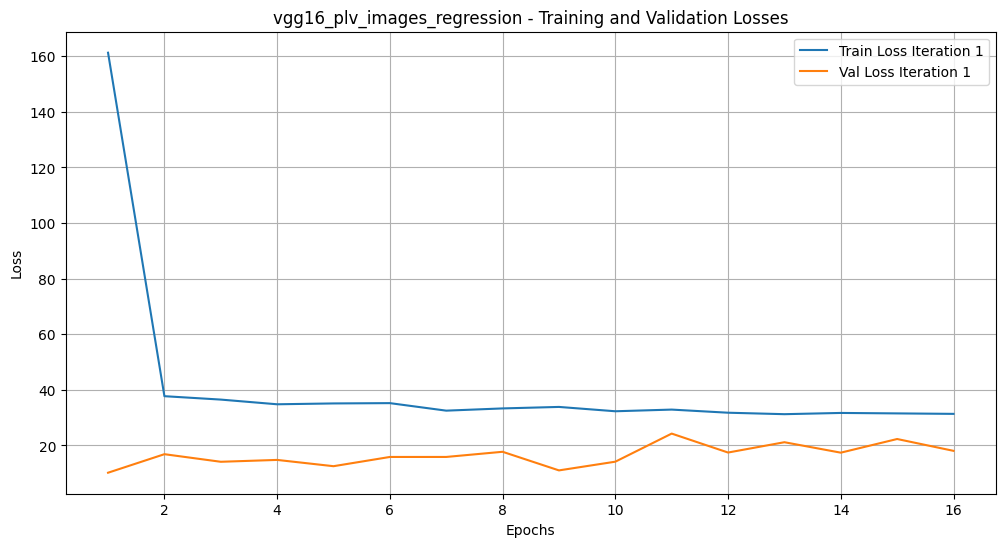

In [ ]:
# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(vgg16_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    vgg16_base_model.summary()

    # Define the model name
    model_name = 'vgg16_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# # Suppose you have confidence scores (e.g., model's certainty)
# # confidence_scores = get_confidence_scores(test_images)  # Define this function as needed

# aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
#     test_subjects, test_image_counts_per_subject, test_predictions
#     # , confidence_scores=confidence_scores  # Uncomment if using
# )


#### ResNet50

In [ ]:
# ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# ResNet50_base_model.summary()

In [ ]:
# model_name = 'ResNet50_plv_images'
# train_and_evaluate_model(ResNet50_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 341.3127 - mean_absolute_error: 15.7161 - mean_squared_error: 341.3127
Epoch 1: val_mean_squared_error improved from inf to 11.12896, saving model to checkpoints/ResNet50_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - loss: 340.5438 - mean_absolute_error: 15.6886 - mean_squared_error: 340.5438 - val_loss: 11.1290 - val_mean_absolute_error: 3.0099 - val_mean_squared_error: 11.1290 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 35.1542 - mean_absolute_error: 4.3967 - mean_squared_error: 35.1542
Epoch 2: val_mean_squared_error improved from 11.12896 to 11.11433, saving model to checkpoints/ResNet50_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 35.1489 - mean_absolute_error: 4.3966 - mean_squared_error: 35.1489 - val_loss: 11.1143 - val_mean_absolute_err

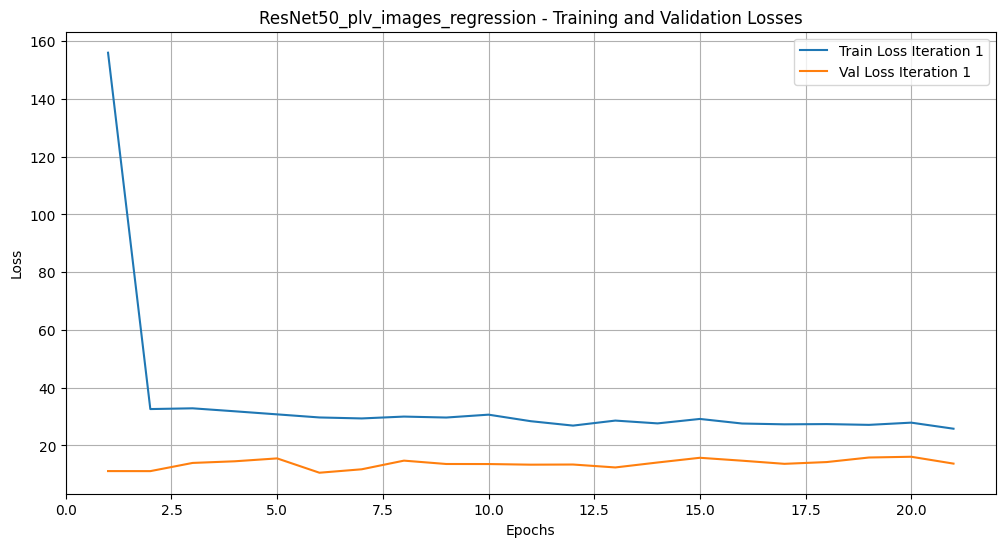

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(ResNet50_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet50_base_model.summary()

    # Define the model name
    model_name = 'ResNet50_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


#### Densenet121

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_8[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)


Iteration 1:
Epoch 1/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 378.6926 - mean_absolute_error: 16.9906 - mean_squared_error: 378.6926
Epoch 1: val_mean_squared_error improved from inf to 12.47818, saving model to checkpoints/DenseNet121_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - loss: 377.4653 - mean_absolute_error: 16.9475 - mean_squared_error: 377.4653 - val_loss: 12.4782 - val_mean_absolute_error: 3.2864 - val_mean_squared_error: 12.4782 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 32.6244 - mean_absolute_error: 4.4479 - mean_squared_error: 32.6244
Epoch 2: val_mean_squared_error improved from 12.47818 to 11.59867, saving model to checkpoints/DenseNet121_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 32.6207 - mean_absolute_error: 4.4477 - mean_squared_error: 32.6207 - val_loss: 11.5987 - val_mean_absolu

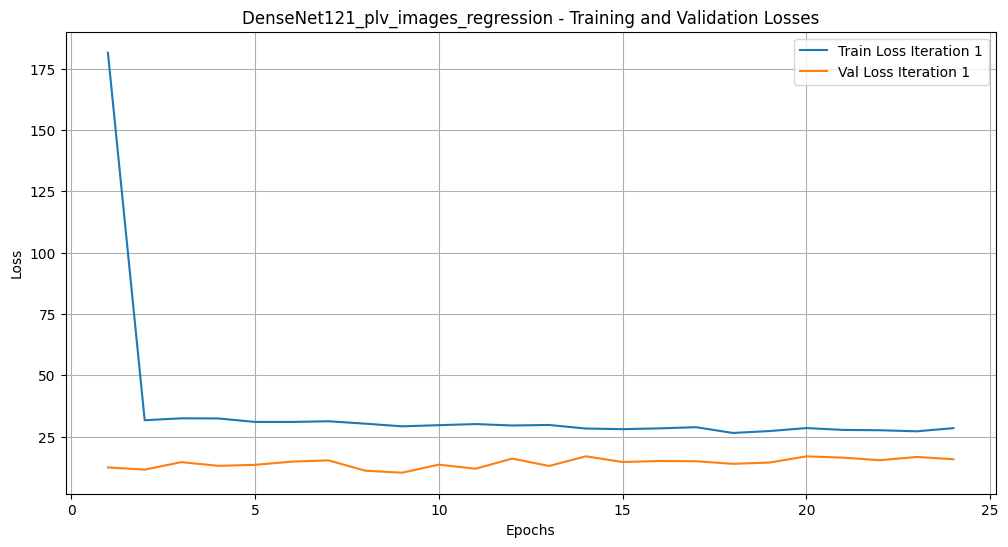

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    DenseNet121_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(DenseNet121_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    DenseNet121_base_model.summary()

    # Define the model name
    model_name = 'DenseNet121_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# Dense_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Dense_base_model.summary()

In [ ]:
# model_name = 'Densenet121_plv_images'
# train_and_evaluate_model(Dense_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### MobileNet V2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 358.0681 - mean_absolute_error: 16.2345 - mean_squared_error: 358.0681
Epoch 1: val_mean_squared_error improved from inf to 12.39361, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - loss: 357.2746 - mean_absolute_error: 16.2064 - mean_squared_error: 357.2746 - val_loss: 12.3936 - val_mean_absolute_error: 3.2375 - val_mean_squared_error: 12.3936 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 33.0137 - mean_absolute_error: 4.5263 - mean_squared_error: 33.0137
Epoch 2: val_mean_squared_error improved from 12.39361 to 11.96867, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 33.0123 - mean_absolute_error: 4.5261 - mean_squared_error: 33.0123 - val_loss: 11.9687 - val_mean_absolu

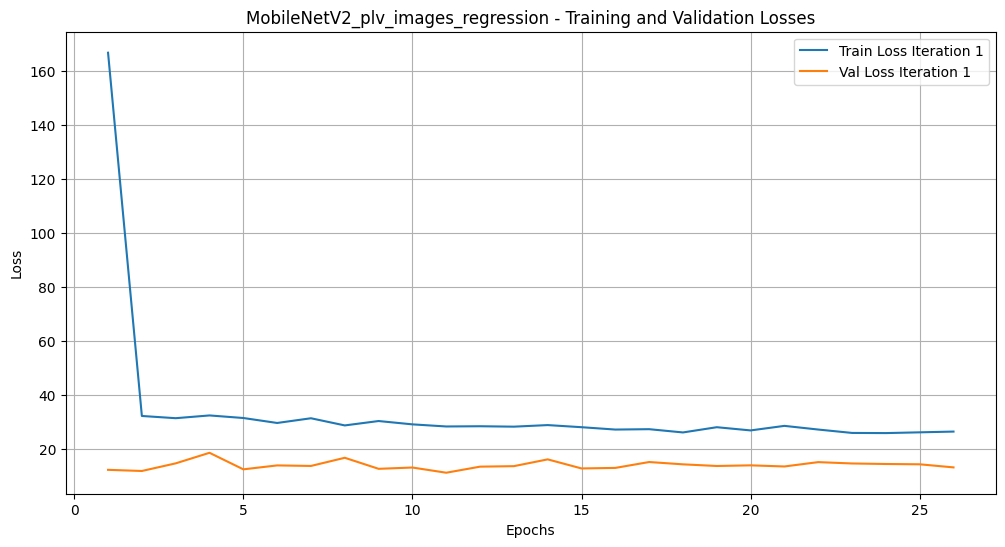

In [ ]:

from tensorflow.keras.applications import MobileNetV2

# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(MobileNetV2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    MobileNetV2_base_model.summary()

    # Define the model name
    model_name = 'MobileNetV2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import MobileNetV2

# MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# MobileNetV2_base_model.summary()

In [ ]:
# model_name = 'mobilenetv2_plv_images'
# train_and_evaluate_model(MobileNetV2_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### EfficientNet B2 & B0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB0_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB0_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB0_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB0_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB0_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_8 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_4           │ (None, 224, 224, 3)    │              7 │ rescaling_8[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_9 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_9[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)


Iteration 1:
Epoch 1/100
960/961 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 344.5977 - mean_absolute_error: 15.8192 - mean_squared_error: 344.5977
Epoch 1: val_mean_squared_error improved from inf to 13.59393, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
961/961 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - loss: 344.2112 - mean_absolute_error: 15.8053 - mean_squared_error: 344.2112 - val_loss: 13.5939 - val_mean_absolute_error: 3.4330 - val_mean_squared_error: 13.5939 - learning_rate: 1.0000e-04
Epoch 2/100
960/961 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28.4999 - mean_absolute_error: 4.0651 - mean_squared_error: 28.4999
Epoch 2: val_mean_squared_error improved from 13.59393 to 12.81864, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
961/961 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - loss: 28.4996 - mean_absolute_error: 4.0651 - mean_squared_error: 28.4996 - val_loss: 12.8186 - val_mean_

In [ ]:
from tensorflow.keras.applications import EfficientNetB2


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB2_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB2_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


Model: "efficientnetb2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_10 (Rescaling)  │ (None, 224, 224, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_5           │ (None, 224, 224, 3)    │              7 │ rescaling_10[0][0]     │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_11 (Rescaling)  │ (None, 224, 224, 3)    │              0 │ normalization_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_11[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,768,569 (29.63 MB)

 Trainable params: 7,700,994 (29.38 MB)

 Non-trainable params: 67,575 (263.97 KB)


Iteration 1:
Epoch 1/100
960/961 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 355.3039 - mean_absolute_error: 16.0821 - mean_squared_error: 355.3039
Epoch 1: val_mean_squared_error improved from inf to 12.67060, saving model to checkpoints/EfficientNetB2_plv_images_regression_best1_weights_iteration_1.weights.h5
961/961 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - loss: 354.9000 - mean_absolute_error: 16.0677 - mean_squared_error: 354.9000 - val_loss: 12.6706 - val_mean_absolute_error: 3.3428 - val_mean_squared_error: 12.6706 - learning_rate: 1.0000e-04
Epoch 2/100
960/961 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 25.4816 - mean_absolute_error: 3.8900 - mean_squared_error: 25.4816
Epoch 2: val_mean_squared_error improved from 12.67060 to 11.25780, saving model to checkpoints/EfficientNetB2_plv_images_regression_best1_weights_iteration_1.weights.h5
961/961 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - loss: 25.4848 - mean_absolute_error: 3.8902 - mean_squared_error: 25.4848 - val_loss: 11.2578 - val_mean_

In [ ]:
# from tensorflow.keras.applications import EfficientNetB0

# # Load pre-trained EfficientNetB0 with weights from ImageNet, excluding the top (classification) layers.
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# base_model.summary()


In [ ]:
# model_name = 'efficientB0_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:
# from tensorflow.keras.applications import EfficientNetB2

# EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# EfficientNetB2_base_model.summary()

In [ ]:
# model_name = 'efficientB2_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### ResNet 18


In [ ]:
# ResNet18 Base Model (Custom)
def ResNet18(input_shape=(224, 224, 3)):
    inputs = tf.keras.layers.Input(shape=input_shape)
    # Custom ResNet18 layers would go here (for demonstration, we use ResNet50 base model)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

ResNet18_base_model = ResNet18()
train_and_evaluate_model(ResNet18_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

NameError: name 'labels' is not defined

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet18_base_model = ResNet18()
    # model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet18_base_model.summary()

    # Define the model name
    model_name = 'ResNet18_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=ResNet18_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)


Iteration 1:


KeyError: 134354443399184

## Train - Full Band

#### VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 383.7320 - mean_absolute_error: 17.2651 - mean_squared_error: 383.7320
Epoch 1: val_mean_squared_error improved from inf to 10.32323, saving model to checkpoints/vgg16_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - loss: 382.9308 - mean_absolute_error: 17.2372 - mean_squared_error: 382.9308 - val_loss: 10.3232 - val_mean_absolute_error: 2.8349 - val_mean_squared_error: 10.3232 - learning_rate: 1.0000e-04
Epoch 2/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 33.5031 - mean_absolute_error: 4.5128 - mean_squared_error: 33.5031
Epoch 2: val_mean_squared_error did not improve from 10.32323
481/481 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 33.5191 - mean_absolute_error: 4.5139 - mean_squared_error: 33.5191 - val_loss: 10.6221 - val_mean_absolute_error: 2.8975 - val_mean_squared_error: 10.6221 - learning_rate: 1.0000e-04
Epoch 3/100
479/481 ━━━━━━━━━━━━

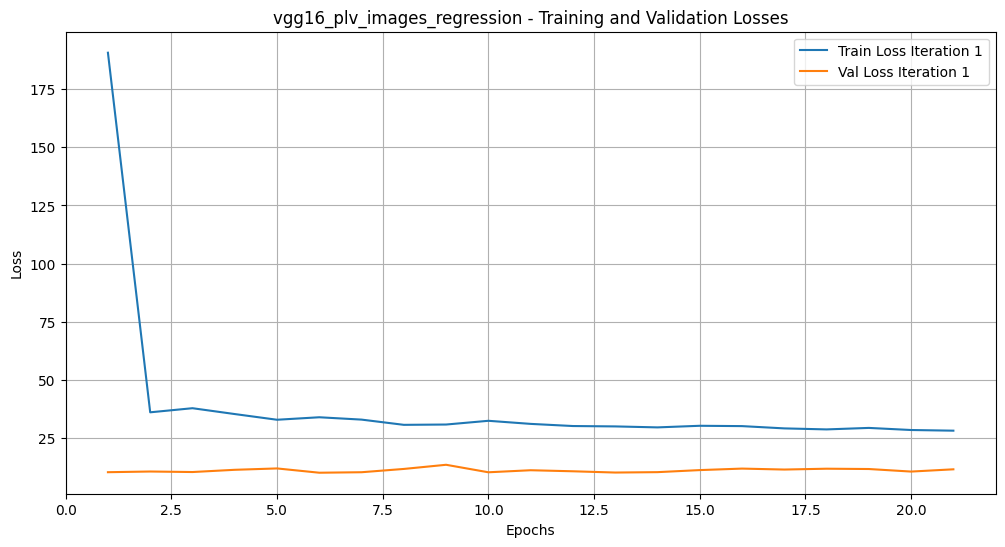

In [ ]:
# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(vgg16_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    vgg16_base_model.summary()

    # Define the model name
    model_name = 'vgg16_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# # Suppose you have confidence scores (e.g., model's certainty)
# # confidence_scores = get_confidence_scores(test_images)  # Define this function as needed

# aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
#     test_subjects, test_image_counts_per_subject, test_predictions
#     # , confidence_scores=confidence_scores  # Uncomment if using
# )


#### ResNet50

In [ ]:
# ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# ResNet50_base_model.summary()

In [ ]:
# model_name = 'ResNet50_plv_images'
# train_and_evaluate_model(ResNet50_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 380.0861 - mean_absolute_error: 17.0192 - mean_squared_error: 380.0861
Epoch 1: val_mean_squared_error improved from inf to 13.21131, saving model to checkpoints/ResNet50_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - loss: 379.2835 - mean_absolute_error: 16.9912 - mean_squared_error: 379.2835 - val_loss: 13.2113 - val_mean_absolute_error: 3.3619 - val_mean_squared_error: 13.2113 - learning_rate: 1.0000e-04
Epoch 2/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 36.6433 - mean_absolute_error: 4.7217 - mean_squared_error: 36.6433
Epoch 2: val_mean_squared_error did not improve from 13.21131
481/481 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 36.6339 - mean_absolute_error: 4.7210 - mean_squared_error: 36.6339 - val_loss: 14.1603 - val_mean_absolute_error: 3.5132 - val_mean_squared_error: 14.1603 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━━━━━━━

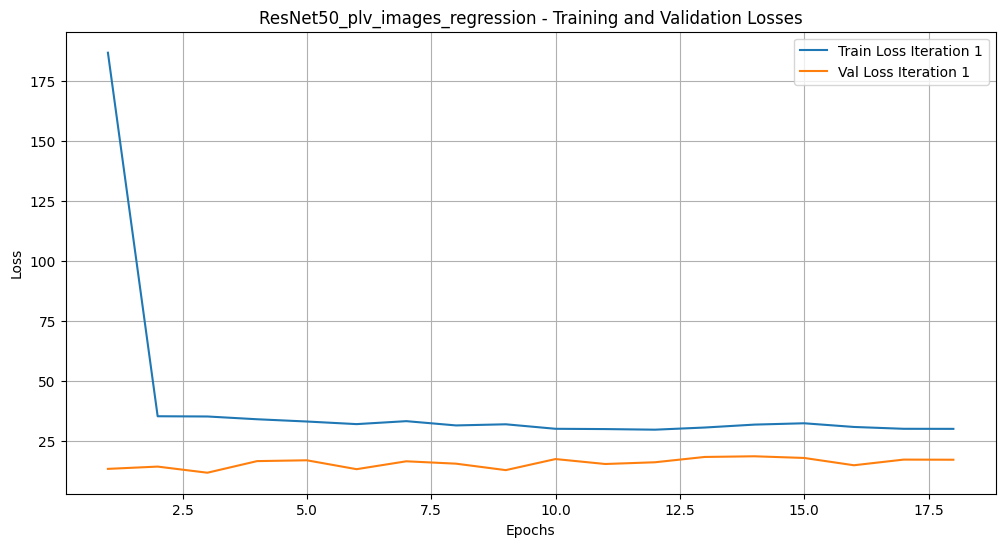

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(ResNet50_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet50_base_model.summary()

    # Define the model name
    model_name = 'ResNet50_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


#### Densenet121

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)


Iteration 1:
Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 376.6629 - mean_absolute_error: 16.8886 - mean_squared_error: 376.6629
Epoch 1: val_mean_squared_error improved from inf to 12.14832, saving model to checkpoints/DenseNet121_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - loss: 376.2502 - mean_absolute_error: 16.8741 - mean_squared_error: 376.2502 - val_loss: 12.1483 - val_mean_absolute_error: 3.2229 - val_mean_squared_error: 12.1483 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 28.2616 - mean_absolute_error: 4.1245 - mean_squared_error: 28.2616
Epoch 2: val_mean_squared_error did not improve from 12.14832
481/481 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 28.2637 - mean_absolute_error: 4.1246 - mean_squared_error: 28.2637 - val_loss: 14.7734 - val_mean_absolute_error: 3.6310 - val_mean_squared_error: 14.7734 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━━━━

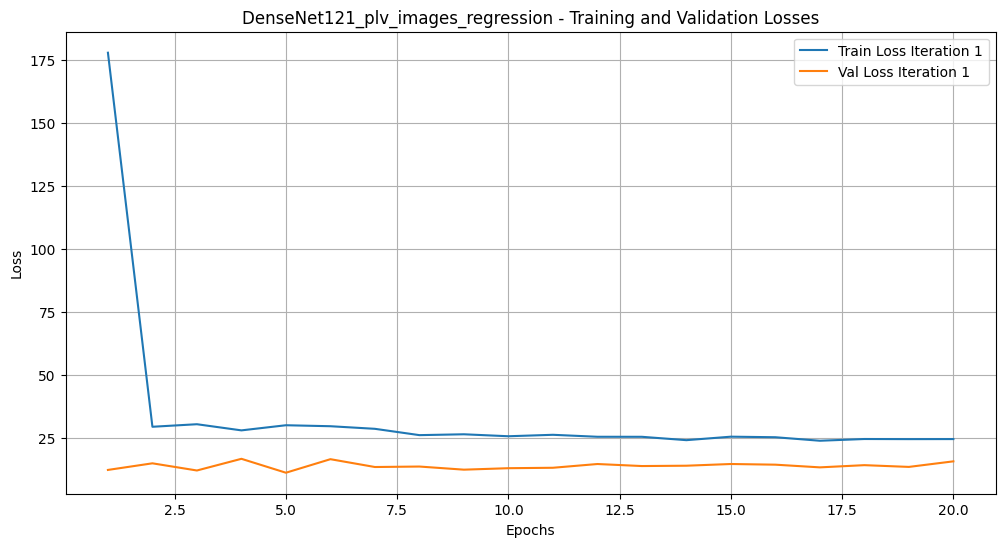

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    DenseNet121_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(DenseNet121_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    DenseNet121_base_model.summary()

    # Define the model name
    model_name = 'DenseNet121_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# Dense_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Dense_base_model.summary()

In [ ]:
# model_name = 'Densenet121_plv_images'
# train_and_evaluate_model(Dense_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### MobileNet V2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 366.8441 - mean_absolute_error: 16.7037 - mean_squared_error: 366.8441
Epoch 1: val_mean_squared_error improved from inf to 14.43115, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - loss: 366.0649 - mean_absolute_error: 16.6762 - mean_squared_error: 366.0649 - val_loss: 14.4311 - val_mean_absolute_error: 3.5747 - val_mean_squared_error: 14.4311 - learning_rate: 1.0000e-04
Epoch 2/100
478/481 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 36.4055 - mean_absolute_error: 4.6762 - mean_squared_error: 36.4055
Epoch 2: val_mean_squared_error improved from 14.43115 to 14.19896, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 36.4036 - mean_absolute_error: 4.6759 - mean_squared_error: 36.4036 - val_loss: 14.1990 - val_mean_absolu

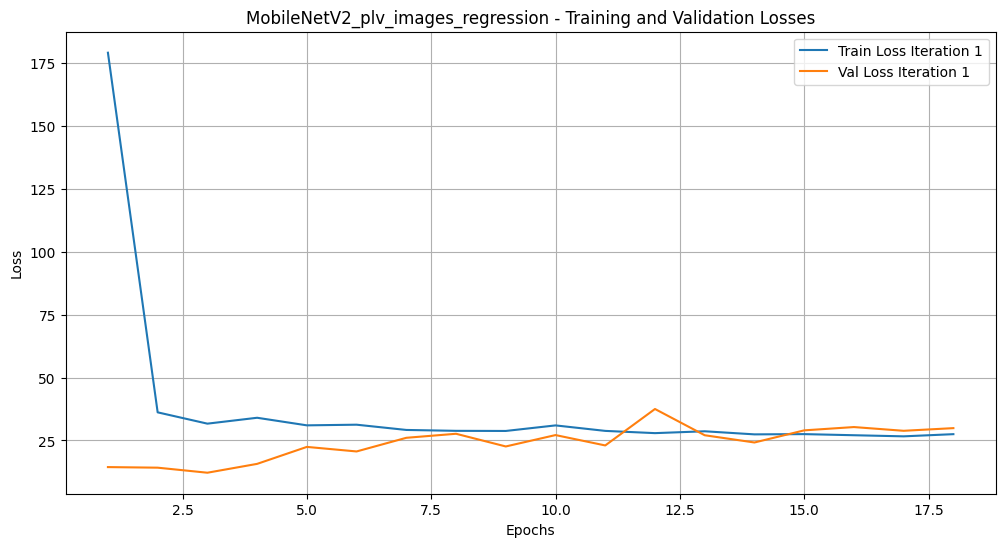

In [ ]:

from tensorflow.keras.applications import MobileNetV2

# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(MobileNetV2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    MobileNetV2_base_model.summary()

    # Define the model name
    model_name = 'MobileNetV2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import MobileNetV2

# MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# MobileNetV2_base_model.summary()

In [ ]:
# model_name = 'mobilenetv2_plv_images'
# train_and_evaluate_model(MobileNetV2_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### EfficientNet B2 & B0

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_4 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 224, 224, 3)    │              7 │ rescaling_4[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_5 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_5[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)


Iteration 1:
Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 467.2808 - mean_absolute_error: 19.9657 - mean_squared_error: 467.2808
Epoch 1: val_mean_squared_error improved from inf to 12.64756, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - loss: 466.8664 - mean_absolute_error: 19.9517 - mean_squared_error: 466.8664 - val_loss: 12.6476 - val_mean_absolute_error: 3.1631 - val_mean_squared_error: 12.6476 - learning_rate: 1.0000e-04
Epoch 2/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 34.6103 - mean_absolute_error: 4.3628 - mean_squared_error: 34.6103
Epoch 2: val_mean_squared_error did not improve from 12.64756
481/481 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 34.5973 - mean_absolute_error: 4.3625 - mean_squared_error: 34.5973 - val_loss: 13.0467 - val_mean_absolute_error: 3.2481 - val_mean_squared_error: 13.0467 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━

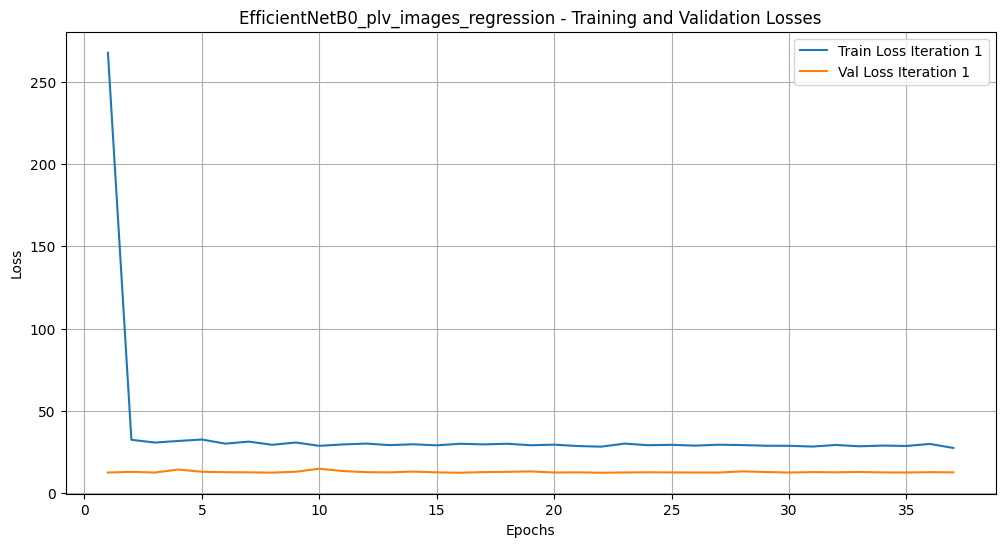

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB0_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB0_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB0_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB0_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB0_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_6 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 224, 224, 3)    │              7 │ rescaling_6[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_7 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_7[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,768,569 (29.63 MB)

 Trainable params: 7,700,994 (29.38 MB)

 Non-trainable params: 67,575 (263.97 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 453.8945 - mean_absolute_error: 19.7687 - mean_squared_error: 453.8945
Epoch 1: val_mean_squared_error improved from inf to 11.77424, saving model to checkpoints/EfficientNetB2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 77s 81ms/step - loss: 453.1232 - mean_absolute_error: 19.7421 - mean_squared_error: 453.1232 - val_loss: 11.7742 - val_mean_absolute_error: 3.0534 - val_mean_squared_error: 11.7742 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 34.8428 - mean_absolute_error: 4.4328 - mean_squared_error: 34.8428
Epoch 2: val_mean_squared_error did not improve from 11.77424
481/481 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 34.8360 - mean_absolute_error: 4.4324 - mean_squared_error: 34.8360 - val_loss: 12.6604 - val_mean_absolute_error: 3.2410 - val_mean_squared_error: 12.6604 - learning_rate: 1.0000e-04
Epoch 3/100
481/481 ━━━

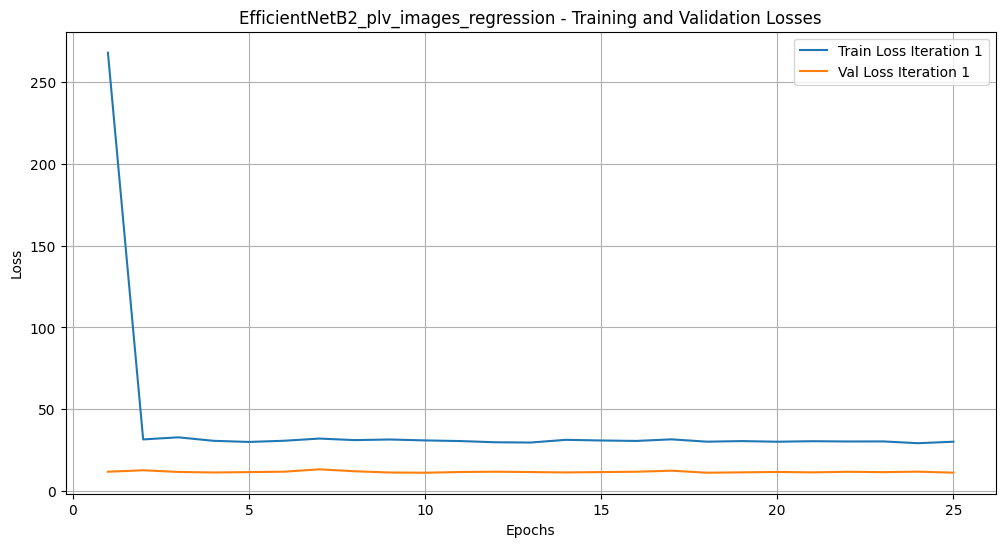

In [ ]:
from tensorflow.keras.applications import EfficientNetB2


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB2_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB2_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import EfficientNetB0

# # Load pre-trained EfficientNetB0 with weights from ImageNet, excluding the top (classification) layers.
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# base_model.summary()


In [ ]:
# model_name = 'efficientB0_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:
# from tensorflow.keras.applications import EfficientNetB2

# EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# EfficientNetB2_base_model.summary()

In [ ]:
# model_name = 'efficientB2_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### ResNet 18


In [ ]:
# ResNet18 Base Model (Custom)
def ResNet18(input_shape=(224, 224, 3)):
    inputs = tf.keras.layers.Input(shape=input_shape)
    # Custom ResNet18 layers would go here (for demonstration, we use ResNet50 base model)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

ResNet18_base_model = ResNet18()
train_and_evaluate_model(ResNet18_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet18_base_model = ResNet18()
    # model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet18_base_model.summary()

    # Define the model name
    model_name = 'ResNet18_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=ResNet18_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )
